<div style="float: left; width: 25%;">
<ul>
<img src="http://www.minesnewsroom.com/sites/default/files/wysiwyg-editor/photos/CO-Mines-logo-stacked-4C-200x235w.png" style="height: 115px;">
</ul>
</div>

<div style="float: right; width: 75%;">
<ul>
    <h1> CSCI 250 - Building a Sensor System </h1>
    <span style="color:red">
        <h2> Piezo element </h2>
    </span>
</ul>
</div>

# Introduction

<img src="https://cdn.sparkfun.com//assets/parts/4/6/8/9/10293_01.jpg" width="30%" align=right>

The piezoelectric effect occurs in certain materials when deformation creates a voltage across the deformed material. This process is also reversible, meaning the material can be vibrated by applying a voltage across it. You can learn more about piezoelectricity on [this page](https://en.wikipedia.org/wiki/Piezoelectricity).

# Wiring

The piezo element outputs a voltage depending on how much it has been deformed, meaning we need to connect it to the [ADC](h_ADC.ipynb) as shown below (wiring for ADC omitted). Piezo elements also have a small capacitance, so they build up undesirable charge; to fix this, include a 1M Ohm (color bands: brown->black->green->gold) pull-down resistor between the wires of the piezo element. Note that the wires connected to the piezo elements are very thin and don't make good electrical connections in the breadboard. To fix this, you can insert the jumper wires or resistor legs into the same holes as the piezo element wires.

<img src="https://www.dropbox.com/s/f0s3midn8kdnd0r/wiring_piezo.PNG?raw=1" align="left" width="65%">

<img src="https://www.dropbox.com/s/h47hsh440npsi4t/circuit_piezo.jpg?raw=1" align="right" width="35%">

# Testing

Refer to the [ADC notebook](h_ADC.ipynb) for information about the ADC operation. It may be hard to test, but if you keep tapping the piezo element when running the code, you should find 0V when undisturbed and some higher voltage when tapped. You could also instead take many measurements very quickly and plot the data to see the response of tapping it.

The following code cell allows you to collect and graph data from the piezo element.

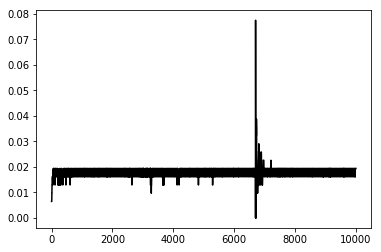

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import spiUtils as su

# This n value takes a few seconds to run so you can test
nDATA  = 10000
toVolt = 3.3/1023
dPIEZO = np.zeros(nDATA,dtype='float')

for i in range(nDATA):
    dPIEZO[i] = toVolt * su.readADC(channel=0) # PIEZO element

plt.plot(dPIEZO,'k');
plt.show()

# Debugging

Useful debugging tips for any time during the semester!

* I get error messages when I run my code.
    * There's probably an issue with your code, not any of the components! Read the error message and try to understand what it's telling you in order to fix it. If you're not sure, ask someone to help you!
* The ADC always returns 0.
    * You're probably having an issue communicating with the ADC, which would most likely come from a wiring problem. Double check your wiring with ADC notebook to make sure the connections are correct. Also double check your code for any bugs, and that you're using the same channel that the piezo element is connected to.
    * Make sure you have decent electrical connections from the piezo element. It's wires are very thin and don't stay well connected in the breadboards, so it can be useful to insert something else into the same breadboard hole to ensure there's a connection, such as a resistor leg or jumper wire.
    * Make sure your pull-down resistor is 1M Ohm. Smaller resistors like 330 Ohms will pull-down much more dramatically, meaning you won't be able to make good measurements.
    * Ensure that the wires haven't broken off the piezo element. Again they're rather thin so they can break easily, especially at the solder joints.
    * If the above steps don't work, raise your hand and we'll come help you.
* I get funky numbers from the ADC test the piezo element.
    * As stated in the wiring section, the voltage across the piezo element doesn't always rest at 0V, which can give you weird values. Be sure to include the 1M Ohm pull-down resistor if you're having problems with this.
    * It's possible that the measurement pin of the ADC is left floating because it's not connected to anything; simply moving your hand near the ADC can cause the values to change! Make sure your piezo element is connected to one of the channel pins of the ADC, and make sure your code is getting data from the same channel.
    * If the above doesn't help, try swapping your piezo element with a neighbor's. If the new one works, yours is likely broken.
    * If your neighbor's piezo element still gives you funky values, try your neighbor's ADC. If the new one works, yours is likely broken.
    * If none of the above steps help, you may be having some other issue; raise your hand and we'll come help you.